# 0. Mathematical functions

This is a course on complex methods in the physical sciences. Before dealing with complex numbers, however, let us undertake a brief review of real mathematical functions and their properties.

## Real functions

A mathematical function, denoted $f$, takes an input $x$ (which is also called an **argument**), and returns an output $f(x)$. For now, we consider the case where both $x$ and $f(x)$ are real numbers. The set of possible inputs is called the **domain** of the function, and the set of possible outputs is called the **range**.

A well-defined function must have an unambiguous output: for any $x$ in the domain, $f(x)$ must be a specific number in the range. In other words, functions must be either one-to-one (injective) mappings, or many-to-one mappings. They can't be one-to-many or many-to-many. This is illustrated by the following graphs:

<img src="img/mathfunctions.png" alt="Figure of one-to-one, many-to-one, and one-to-many mappings." width=50%>

Simple examples of mathematical functions are those based on elementary algebra operations:

$$f(x) = x + 2 \,\;\;\qquad\qquad \text{(a one-to-one function)}$$
$$f(x) = x^2 + 2x + 4 \qquad \text{(a many-to-one function)}$$


<a name="exponential"></a>
### Exponential and logarithm

The exponential function $\exp(x)$ is a particularly important and ubiquitous function.  You've probably come across this function before, but let's remind ourselves of how and why it's defined.  We begin with a meditation on what it means to take a number $x$ to the power of $y$:

$$f(x) = x^y.$$

For values of $y$ in natural numbers $\mathbb{N} \equiv \{1,2,3,\dots\}$, the power operation simply means multiplying $x$ by itself $y$ times.  For example, $x^4 = x \cdot x \cdot x \cdot x$.  But what about non natural number powers, like $x^{-1}$ or $x^{1/2}$ or $x^{3.14}$?  To answer this question, we introduce the natural exponential function, defined as the following limiting infinite series:

$$\exp(x) \equiv \lim_{n\rightarrow\infty} \left(1+\frac{x}{n}\right)^n = 1 + \sum_{n=1}^\infty\frac{x^n}{n!}, \qquad x \in \mathbb{R}.$$

It is [left as an exercise](#exercises) for you to show that the two infinite series formulas in this definition are equivalent.  Note that both the infinite series use natural number powers only.  The function's domain is the entire set of real numbers, $\mathbb{R}$, and its range is the set of positive numbers, $\mathbb{R}^+$. Its graph is as follows:
<a name="exponential function plot"></a>


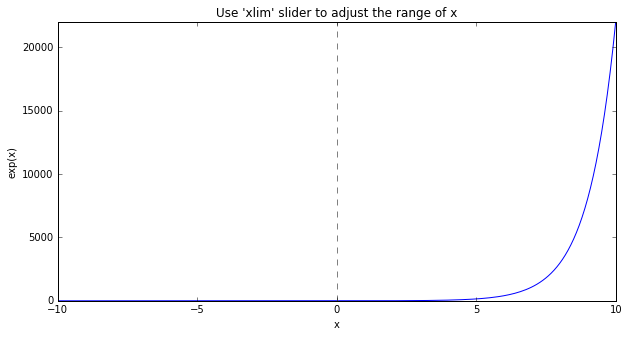

In [1]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, exp, maximum
import matplotlib.pyplot as plt

def plot_exponential(xlim):
    x = linspace(-xlim, xlim, 200)
    y = exp(x)
    plt.figure(figsize=(10,5))
    plt.plot(x, y, 'b')
    plt.plot([0., 0.], [0., y[-1]], '--', color='grey')
    plt.title("Use 'xlim' slider to adjust the range of x")
    plt.xlim(-xlim, xlim)
    plt.ylim(0., y[-1])
    plt.xlabel('x')
    plt.ylabel('exp(x)')

interact(plot_exponential,
         xlim=FloatSlider(min=1.0, max=16.0, step=1.0, value=2.0));

A highly noteworthy feature of $\exp(x)$ is that, for $x > 0$, it becomes large extremely quickly with increasing $x$.  For $x < 0$, it becomes small extremely quickly with decreasing $x$.  It also has a number of other useful mathematical properties.  For instance, one can show that

$$\exp(x+y) = \exp(x)\,\exp(y) \quad \forall x, y \in \mathbb{R}.$$

([Try proving this as an exercise](#exercises).)

As a corollary,

$$\exp(-x) = 1/\exp(x).$$

Because the exponential function is one-to-one, its inverse is also a well-defined function.  We call this the natural logarithm:

$$\ln(x) \equiv y \;\; \mathrm{such}\;\mathrm{that}\;\;\exp(y) = x.$$

Unless otherwise noted, we will always mean the natural logarithm when we say "logarithm".  The domain of the logarithm is $y \in \mathbb{R}^+$, and its range is $\mathbb{R}$.  Its graph is shown below:

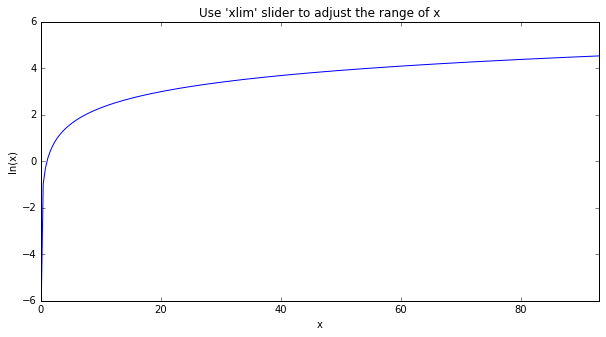

In [1]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, log, maximum
import matplotlib.pyplot as plt

def plot_logarithm(xlim):
    x = linspace(1e-3, xlim, 250)
    y = log(x)
    plt.figure(figsize=(10,5))
    plt.plot(x, y, 'b')
    plt.plot([0., 0.], [0., y[-1]], '--', color='grey')
    plt.title("Use 'xlim' slider to adjust the range of x")
    plt.xlim(0., xlim)
    plt.ylim(-6, 6)
    plt.xlabel('x')
    plt.ylabel('ln(x)')

interact(plot_logarithm,
         xlim=FloatSlider(min=1.0, max=200., step=1.0, value=2.0));

Observe that for $x>0$, $\ln(x)$ increases very slowly with $x$.  This is the opposite of the exponential function's behavior, where $\exp(x)$ increases very quickly with $x$.  One can also show that the logarithm satisfies the important property

$$\ln(xy) = \ln(x) + \ln(y).$$

Hence, the power operation interacts with the exponential and logarithm functions in the following manner:

$$\begin{align} \ln(x^y) &= y \ln(x)\qquad\quad&\mathrm{for}&\;\;y \in \mathbb{N} \\ \Rightarrow\quad\quad x^y &= \exp[y \ln(x)] \quad &\mathrm{for}&\;\;y \in \mathbb{N}.\end{align}$$

Now we have the tools we need to discuss the issue raised at the beginning of this section, i.e. how to deal with the concept of a non-natural power.  Let us generalize the above equation by assuming that it continues to hold true for any positive $x$ and real $y$, not just for $y \in \mathbb{N}$.  In other words, we treat this as our *definition* of what it means to perform the power operation, for non-natural powers:

$$x^y \equiv \exp[y \ln(x)] \qquad\; \mathrm{for}\; x \in \mathbb{R}^+, \;y \notin \mathbb{N}.$$

Based on this definition, the power operation always gives a positive result.  You can also check for yourself that, for $y \in \mathbb{N}$, the formula is consistent with the results based on using the standard definition of "multiply $x$ by itself $y$ times".

This generalization of the power operation leads to many extremely important consequences:
* Raising a positive number to the zeroth power gives unity: $\displaystyle x^0 = 1$
* Negative powers are reciprocals: $\displaystyle x^{-y} = \exp[-y\ln(x)] = \exp[-\ln(x^y)] = \frac{1}{x^y}.$
* The exponential function can itself can be written as a power: $\displaystyle\exp(y) = e^y$, where $e \equiv \exp(1) = 2.718281828459\dots$
* Non-integer powers are only defined for non-negative $x$, since the logarithm in the definition does not accept negative inputs.

<a name="trigonometric"></a>
### Trigonometric functions

The fundamental trignonometric functions $\sin(\theta)$, $\cos(\theta)$, and $\tan(\theta)$ can be defined in terms of the geometric ratios of the sides of right-angled triangles, as shown here:
<img src="img/trigonometry.png" alt="Basic definitions of trigonometric functions." width=30%>

In this basic definition, the domain is $\theta \in [0, \,\pi/2)$, where the angle $\theta$ is given in radians.  We can generalize the definitions to allow for negative values of $a$ and/or $b$, using the following scheme:
<img src="img/trigonometry2.png" alt="Enhanced definitions of trigonometric functions." width=30%>
Now the angle $\theta$ lies within a larger domain: $\theta \in [0,\,2\pi)$.

We can further generalize the trigonometric functions by extending the domain to all real numbers: $\theta \in \mathbb{R}$. This is done by treating all values of $\theta$ modulo $2\pi$ as equivalent, i.e. $f(\theta + 2\pi) = f(\theta)$.  With this generalization, the trigonometric functions become many-to-one functions.

From the [Pythagorean theorem](http://en.wikipedia.org/wiki/Pythagoras_theorem) (which can be proved in [many, many ways](http://www.faculty.umb.edu/gary_zabel/Courses/Phil%20281b/Philosophy%20of%20Magic/Arcana/Neoplatonism/Pythagoras/index.shtml.html)),

$$\big[\sin(\theta)\big]^2 + \big[\cos(\theta)\big]^2 = 1.$$

Armed with this result, we can go on to prove a variety of identities, like the addition identities

$$\begin{aligned}\sin(\theta_1 + \theta_2) &= \sin(\theta_1) \cos(\theta_2) + \cos(\theta_1)\sin(\theta_2) \\\cos(\theta_1 + \theta_2) &= \cos(\theta_1) \cos(\theta_2) - \sin(\theta_1)\sin(\theta_2)\end{aligned}$$

As you may recall, these identities can be proved by trigonometry; the proofs involve drawing the correct set of triangles, and choosing which sides of the triangles to put into the Pythagorean formula.  ([As an exercise](#exercises), try proving either of the above identities trigonometrically.)  There are two problems with such proofs: (i) they require a certain amount of ingenuity in choosing which triangle diagrams to draw, and (ii) it's not immediately obvious that the proofs work if the angles lie outside $[0,\pi/2]$.  Happily, there is a solution to both problems: as we'll soon see, trigonometric identities of this sort can be proven algebraically, with the aid of [complex numbers](03_complex_numbers.ipynb).

### Hyperbolic functions<a name="hyperbolic"></a>

The hyperbolic functions are important special functions which are defined in terms of exponentials:

$$\begin{aligned}\sinh(x) &= \frac{1}{2}\left(e^{x} - e^{-x}\right) \\ \cosh(x) &= \frac{1}{2}\left(e^{x} + e^{-x}\right) \\ \tanh(x) &= \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}\end{aligned}$$

These functions have properties intriguingly similar to the trignometric functions. For example, they have addition identities

$$\begin{aligned}\sinh(x+y) &= \sinh(x)\cosh(y) + \cosh(x)\sinh(y) \\
\cosh(x+y) &= \cosh(x)\cosh(y) + \sinh(x)\sinh(y)\end{aligned}$$

Because of these identities, it's sometimes more convenient to work with hyperbolic functions rather than exponentials. We'll deal with such situations when we get to them.

<a name="continuity"></a>
## Continuity

'''Continuity''' is an important concept which refers to the idea that a function's output $x$ does not make any abrupt jumps as we vary the input $x$.  A function can be continuous over its entire domain, or only a subset of its domain (mathematicians have even come up with functions that are discontinuous everywhere in their domain, but such pathological cases are uncommon in physics applications). For example, $f(x) = 1/x$ is discontinuous at the origin $x = 0$.  So is the step function
$$\Theta(x) = \left\{\begin{array}{ll} 1, &\;\;\;\textrm{for} \; x \ge 0\\ 0,&\;\;\; \textrm{otherwise.}\end{array}\right.$$

The rigorous definition of continuity is as follows.  A function is continuous at a point $x_0$ if, for any $\epsilon > 0$, we can find a $\delta > 0$ such that setting $x$ closer to $x_0$ than a distance of $\delta$ brings $f(x)$ closer to $f(x_0)$ than the specified distance $\epsilon$.  This sounds like a very complicated sentence (and it is!), and it may be easier to understand it using the illustration below:

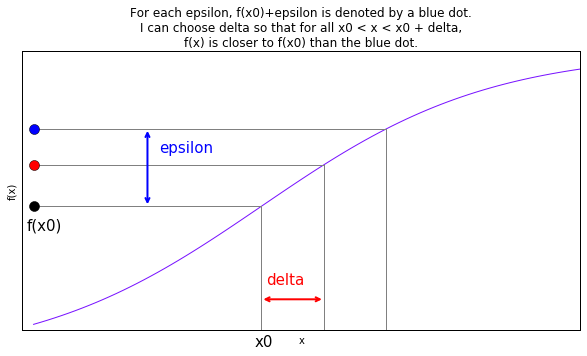

In [2]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, tanh, arctanh
import matplotlib.pyplot as plt

def plot_continuity(epsilon):
    x, x0 = linspace(0.0, 3.0, 100), 1.0
    y, y0 = tanh(x-1), tanh(x0-1)

    y1 = y0 + epsilon
    x1 = 1 + arctanh(y1)
    
    delta = 0.5 * (x1 - x0)
    x2    = x0 + delta
    y2    = tanh(x2-1)
    
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    plt.plot(x, y, '#7812ff')
    plt.plot([x0,x0], [-1.,y0], color='grey')
    plt.plot([0, x0], [y0, y0], color='grey')
    plt.plot([x1,x1], [-1.,y1], color='grey')
    plt.plot([0, x1], [y1, y1], color='grey')
    plt.plot([x2,x2], [-1.,y2], color='grey')
    plt.plot([0, x2], [y2, y2], color='grey')
    plt.plot(0, y0, 'o', color='black', markersize=10)
    plt.plot(0, y1, 'o', color='blue', markersize=10)
    plt.plot(0, y2, 'o', color='red', markersize=10)
    plt.title("For each epsilon, f(x0)+epsilon is denoted by a blue dot.\n\
I can choose delta so that for all x0 < x < x0 + delta,\n\
f(x) is closer to f(x0) than the blue dot.")
    plt.text(x0-0.03, -0.9, 'x0', fontsize=15, color='black')
    plt.text(-0.03, y0-0.15, 'f(x0)', fontsize=15, color='black')
    plt.annotate('', xy=(0.5, y0), xycoords='data', xytext=(0.5, y1), textcoords='data',
                 arrowprops={'color': 'blue', 'arrowstyle': '<->', 'linewidth':2})
    plt.text(0.55, 0.3*y0+0.7*y1, 'epsilon', fontsize=15, color='blue')
    plt.annotate('', xy=(x0, -0.6), xycoords='data', xytext=(x2, -0.6), textcoords='data',
                 arrowprops={'color': 'red', 'arrowstyle': '<->', 'linewidth':2})
    plt.text(0.02+x0, -0.5, 'delta', fontsize=15, color='red')
    plt.xlim(-0.05, 2.4)
    plt.ylim(-0.8, 1.0)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plt.xlabel('x')
    plt.ylabel('f(x)')

interact(plot_continuity,
         epsilon=FloatSlider(min=0.2, max=0.8, step=0.05, value=0.5));

A counter-example, with a function that has a discontinuity at some $x_0$, is shown below.  If we choose $\epsilon$ smaller than the gap, then no matter what value of $\delta > 0$ we try, any choice of $0 < x < \delta$ will give a value of $f(x)$ that's further than $\epsilon$ from $f(x_0)$. Hence, the continuity condition is violated for sufficiently small choices of $\epsilon = 1/2$, and we say that $f(x)$ is **discontinuous** at $x_0$.

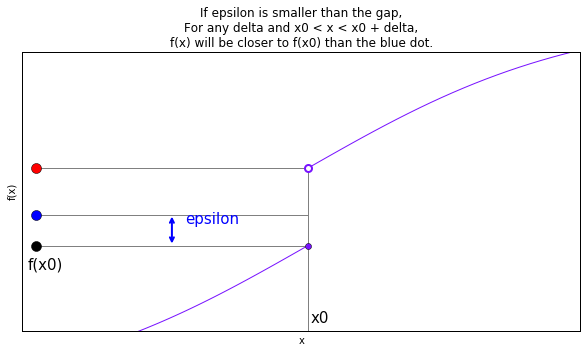

In [3]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, tanh, arctanh
import matplotlib.pyplot as plt

def plot_discontinuity(epsilon):
    dy = 0.25
    xa, xb, x0 = linspace(0., 1., 50), linspace(1.0, 3.0, 50), 1.0
    ya, yb, y0 = tanh(xa-1)- dy, tanh(xb-1)+dy, tanh(x0-1)-dy

    y1 = y0 + epsilon
    x1 = max(x0, 1 + arctanh(y1-dy))
    
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    plt.plot(xa, ya, color='#7812ff')
    plt.plot(xb, yb, color='#7812ff')
    plt.plot([x0,x0], [-1.,y0], color='grey')
    plt.plot([0, x0], [y0, y0], color='grey')
    plt.plot([x1,x1], [-1.,y1], color='grey')
    plt.plot([0, x1], [y1, y1], color='grey')
    plt.plot(0, y0, 'o', color='black', markersize=10)
    plt.plot(0, y1, 'o', color='blue', markersize=10)
    plt.title("If epsilon is smaller than the gap,\n\
For any delta and x0 < x < x0 + delta,\n\
f(x) will be closer to f(x0) than the blue dot.")
    plt.text(x0+0.01, -0.75, 'x0', fontsize=15, color='black')
    plt.text(-0.03, y0-0.15, 'f(x0)', fontsize=15, color='black')
    plt.annotate('', xy=(0.5, y0), xycoords='data', xytext=(0.5, y1), textcoords='data',
                 arrowprops={'color': 'blue', 'arrowstyle': '<->', 'linewidth':2})
    plt.text(0.55, 0.3*y0+0.7*y1, 'epsilon', fontsize=15, color='blue')
    
    if epsilon > 2*dy:
        delta = 0.5 * (x1 - x0)
        x2    = x0 + delta
        y2    = tanh(x2-1) + dy
        plt.plot([x2,x2], [-1.,y2], color='grey')
        plt.plot([0, x2], [y2, y2], color='grey')
        plt.plot(0, y2, 'o', color='red', markersize=10)
        plt.annotate('', xy=(x0, -0.6), xycoords='data', xytext=(x2, -0.6), textcoords='data',
                     arrowprops={'color': 'red', 'arrowstyle': '<->', 'linewidth':2})
        plt.text(0.02+x0, -0.5, 'delta', fontsize=15, color='red')
    else:
        plt.plot([x0,x0], [-1.,yb[0]], color='grey')
        plt.plot([0, x0], [yb[0], yb[0]], color='grey')
        plt.plot(0, yb[0], 'o', color='red', markersize=10)

    plt.plot(xa[-1], ya[-1], 'o', color='#7812ff')
    plt.plot(xb[0], yb[0], 'o', markeredgecolor='#7812ff',
             markersize=7, markeredgewidth=2, markerfacecolor='#ffffff')
    
    plt.xlim(-0.05, 2.0)
    plt.ylim(-0.8, 1.0)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plt.xlabel('x')
    plt.ylabel('f(x)')

interact(plot_discontinuity,
         epsilon=FloatSlider(min=0.2, max=1.0, step=0.05, value=0.8));

## Exercises
<a name="exercises"></a>

<ol>
<li>Prove that the two infinite series definitions of the exponential are equivalent:<br/>$$\lim_{n\rightarrow\infty} \left(1+\frac{x}{n}\right)^n = 1 + \sum_{n=1}^\infty\frac{x^n}{n!}.$$</li>
<li>Prove that $\exp(x+y) = \exp(x)\,\exp(y)$, using the definition<br/>$$\exp(x) \equiv 1 + \sum_{n=1}^\infty\frac{x^n}{n!}.$$<br/>In this proof, avoid using the concept of "raising to the power" of a non-natural number (this is so that we can use this property of the exponential function in [the definition of a non-natural number power](#exponential)).</li>
<li>One of the most important features of the exponential function $\exp(x)$ is that it becomes large *extremely* quickly with increasing $x$.  To illustrate this behavior, consider the [graph of the exponential function](#exponential function plot) above.  By default, the graph plots up to $x = 4$, and on your computer screen the height of the graph should be around 4cm.  Suppose we keep the same resolution, and plot up to $x = 10$; how high would the graph be?  What about if we plotted up to $x = 20$?</li>
<li>Prove, using the [generalized definition of the power operation](#exponential), that<br/>$$\exp(x) = [\exp(1)]^x.$$</li>
<li>A "non-natural" logarithm of base $c$ is defined as<br/>
$$\log_c(x) = y \quad\mathrm{where}\;\; c^y = x.$$<br/>
Using the [generalized definition of the power operation](#exponential), derive an expression for the non-natural logarithm in terms of the natural logarithm.</li>
<li>Prove, using trigonometry, that<br/>$$\sin(\theta_1 + \theta_2) = \sin(\theta_1) \cos(\theta_2) + \cos(\theta_1)\sin(\theta_2).$$<br/>You may assume that $\theta_1, \theta_2 \in [0, \pi/2].$</li>
<li>Prove, using the [trigonometric addition formulas](#trigonometric), that<br/>$$\begin{align} \cos(3x) &= 4[\cos(x)]^3 -3\cos(x) \\ \sin(3x) &= 3\sin(x)-4[\sin(x)]^3\end{align}$$</li>
</ol>
